In [199]:
pwd

'/Users/boris/Documents/DataScience/royco_spiced_projects/WEEK12 Final Project/Data/Processed Data'

In [203]:
cd Raw Data

/Users/boris/Documents/DataScience/royco_spiced_projects/WEEK12 Final Project/Data/Raw Data


# Import

In [227]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Models:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

from sklearn.model_selection import train_test_split


from statsmodels.tsa.ar_model import AutoReg

# sklearn's Feature Engineering tools:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from statsmodels.tsa.ar_model import ar_select_order

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# sklearn's Feature Engineering tools:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# The Transformers:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# to visualize the column transformer and pipeline
from sklearn import set_config
set_config(display='diagram')

%matplotlib inline
from IPython import display

from statsmodels.api import OLS, add_constant

from sqlalchemy import create_engine

plt.rcParams['figure.figsize']=(14,6)
sns.set_style("whitegrid")

# Load budget data

In [228]:
budget = pd.read_excel('budget.xlsx')

# EDA

In [229]:
budget

,Season,Team,Budget,position,points
0,2009-2010,Real Madrid,451.7,2,96
1,2009-2010,Barcelona,515.4,1,99
2,2009-2010,Valencia,240.0,3,71
3,2009-2010,Sevilla,218.3,4,63
4,2009-2010,Ath Madrid,210.8,9,47
...,...,...,...,...,...
195,2018-2019,Alaves,110.8,11,50
196,2018-2019,Girona,97.2,18,37
197,2018-2019,Vallecano,86.7,20,32
198,2018-2019,Huesca,61.4,19,33


In [230]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    200 non-null    object 
 1   Team      200 non-null    object 
 2   Budget    200 non-null    float64
 3   position  200 non-null    int64  
 4   points    200 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.9+ KB


In [231]:
budget['Team'].unique()

array(['Real Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Ath Madrid',
       'Villarreal', 'La Coruna', 'Ath Bilbao', 'Espanol', 'Zaragoza',
       'Racing', 'Getafe', 'Mallorca', 'Osasuna', 'Almeria', 'Malaga',
       'Valladolid', 'Sp Gijon', 'Tenerife', 'Xerez', 'Sociedad',
       'Hercules', 'Levante', 'Granada', 'Betis', 'Vallecano', 'Celta',
       'Elche', 'Malaga ', 'Cordoba', 'Eibar', 'Las Palmas', 'Alaves',
       'Leganes', 'Girona', 'Huesca'], dtype=object)

In [232]:
budget.isna().sum()

Season      0
Team        0
Budget      0
position    0
points      0
dtype: int64

<AxesSubplot:>

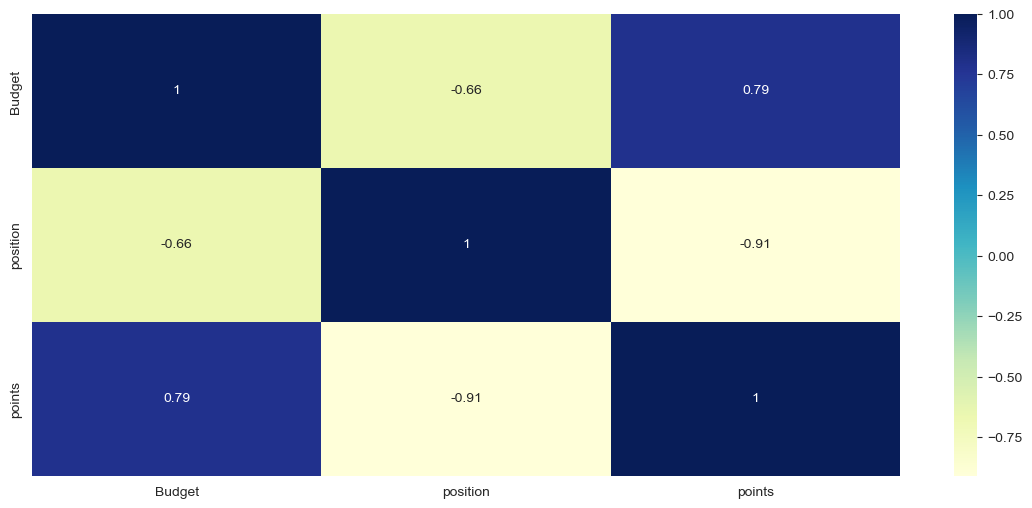

In [233]:
sns.heatmap(round(budget.corr(),2), annot=True, cmap="YlGnBu")

Correlation coefficient: -0.6555554243085234


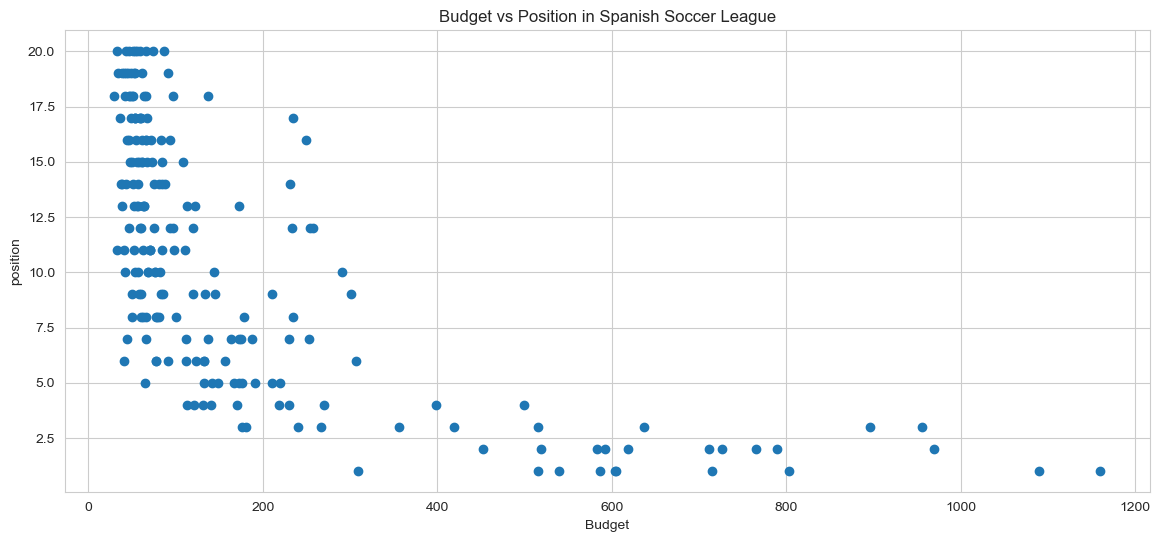

In [234]:
# create a scatter plot of budget vs position
plt.scatter(budget['Budget'], budget['position'])

# add labels and title
plt.xlabel('Budget')
plt.ylabel('position')
plt.title('Budget vs Position in Spanish Soccer League')

# calculate and print the correlation coefficient
corr_coef = budget['Budget'].corr(budget['position'])
print('Correlation coefficient:', corr_coef)

# show the plot
plt.show()

Correlation coefficient for 2009-2010 season: -0.7454000857310752


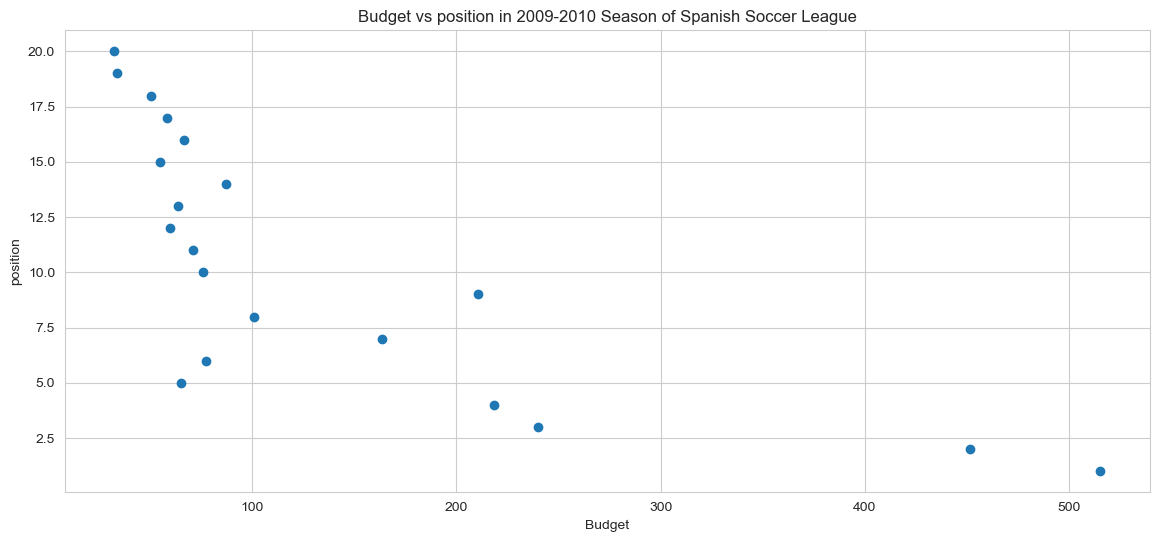

Correlation coefficient for 2010-2011 season: -0.6939992893831686


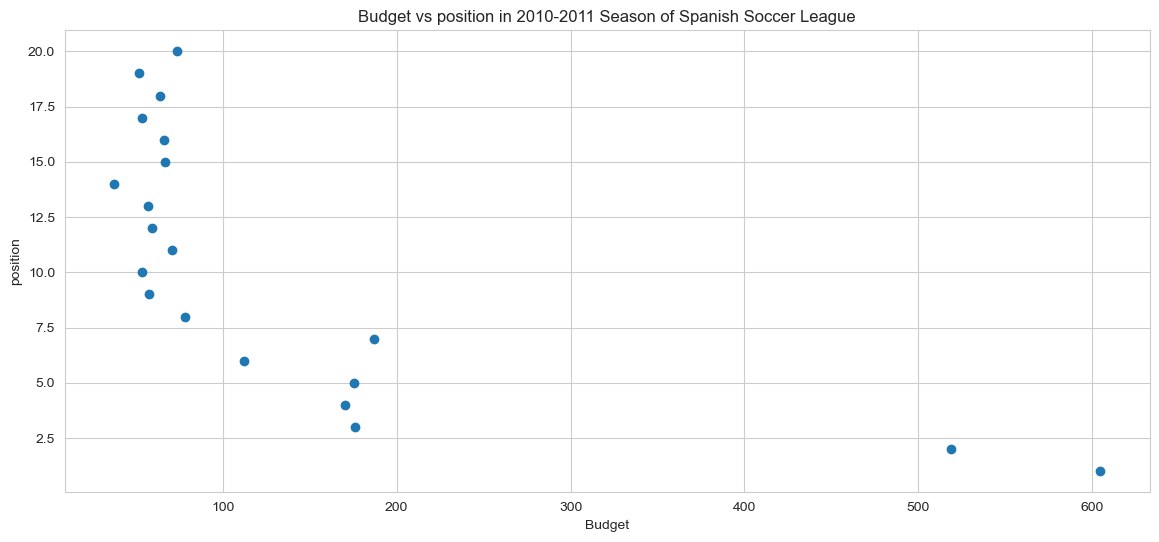

Correlation coefficient for 2011-2012 season: -0.6195192135326829


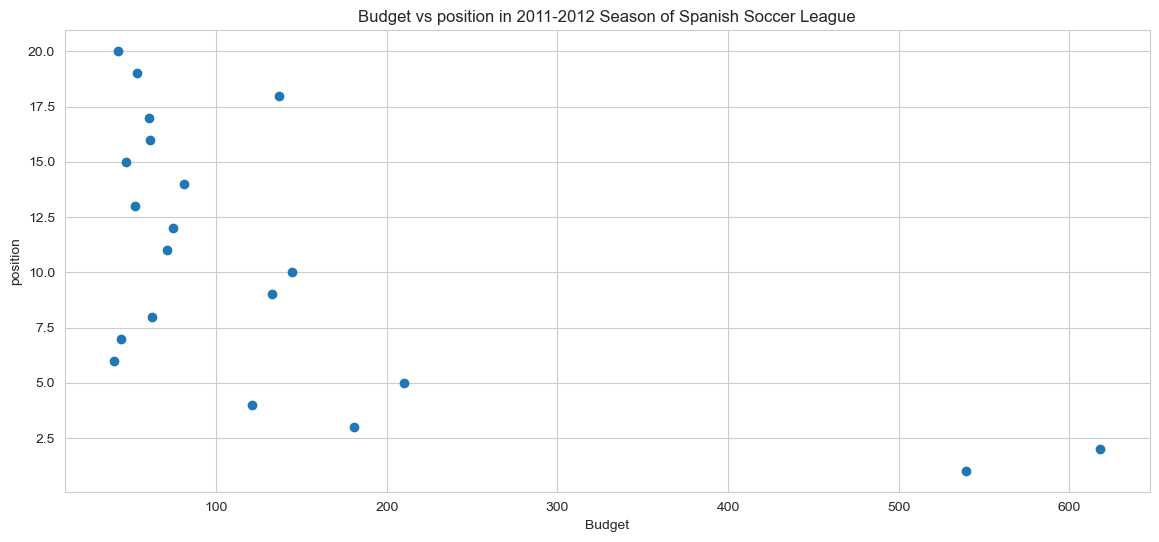

Correlation coefficient for 2012-2013 season: -0.6971441346731573


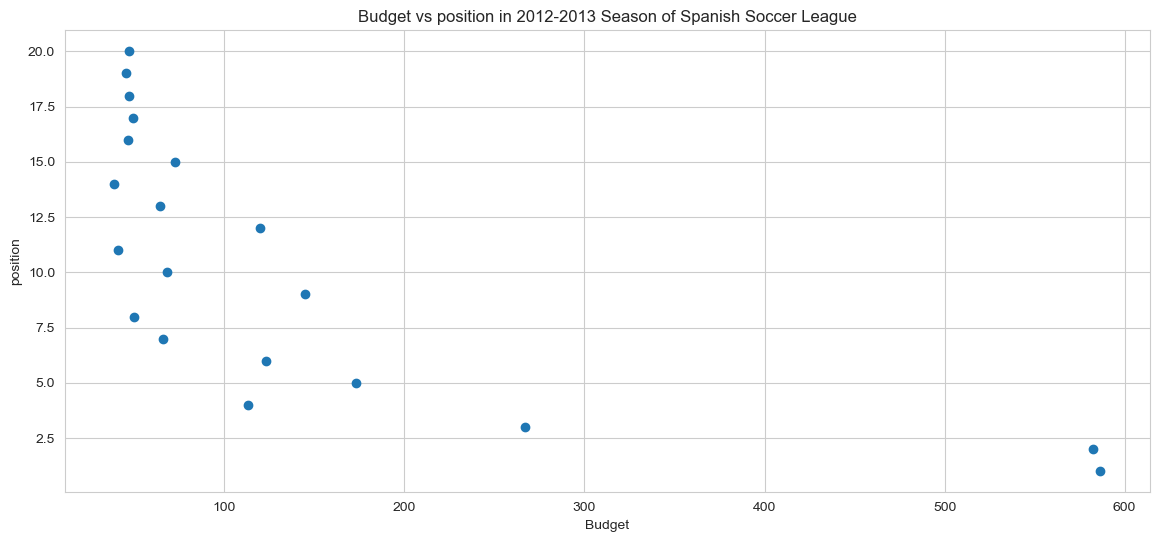

Correlation coefficient for 2013-2014 season: -0.676872327696307


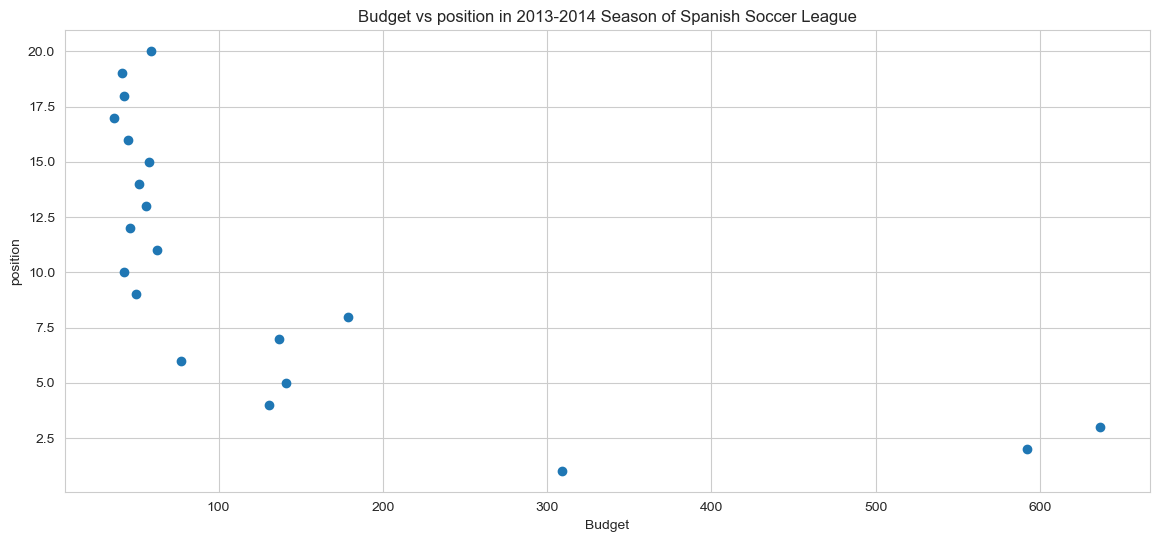

Correlation coefficient for 2014-2015 season: -0.7202059805973441


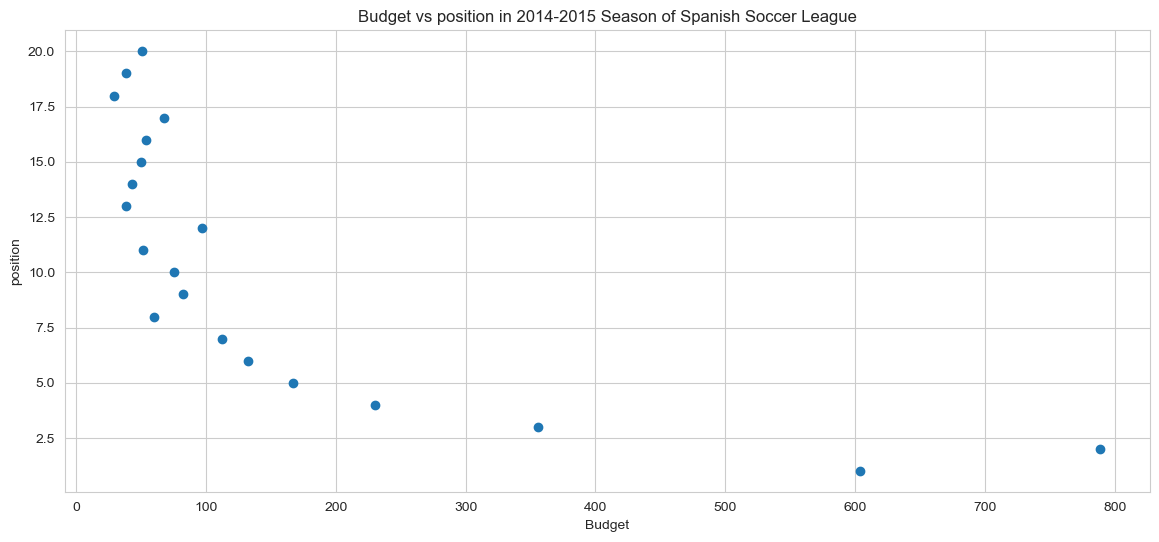

Correlation coefficient for 2015-2016 season: -0.6970328863574526


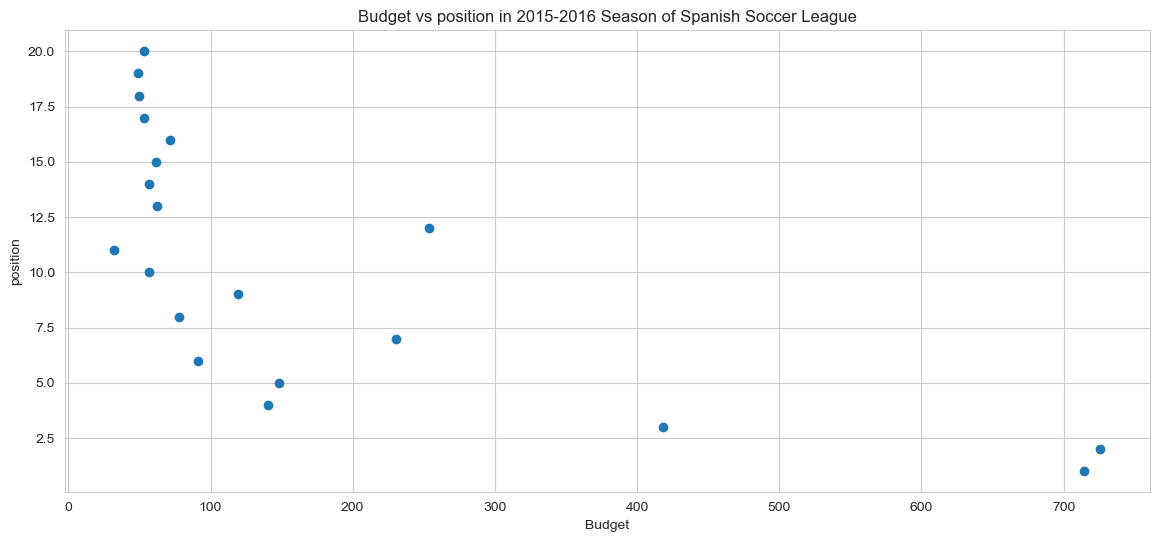

Correlation coefficient for 2016-2017 season: -0.7375133873504278


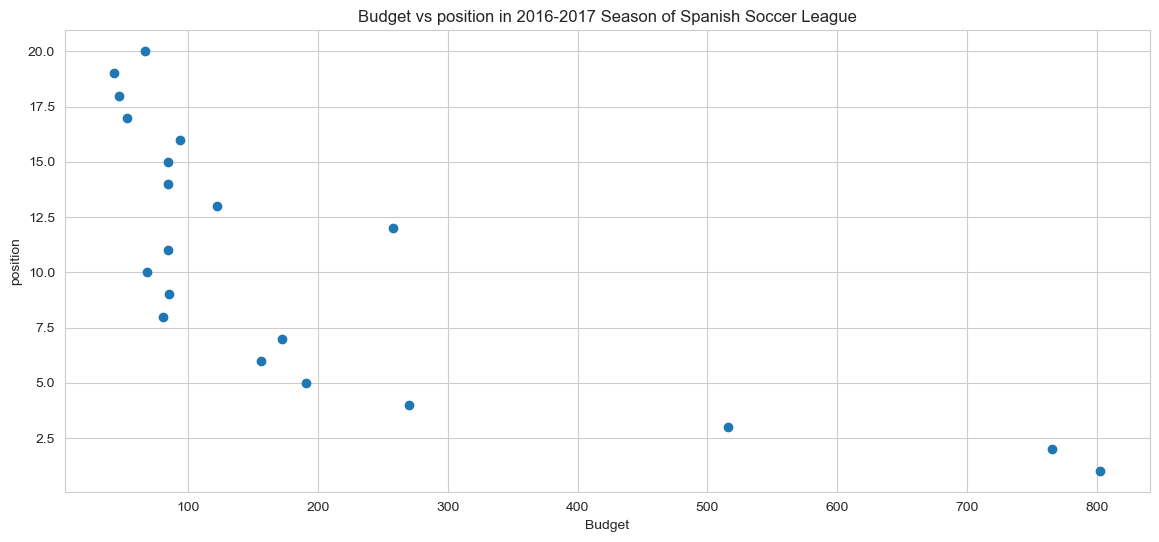

Correlation coefficient for 2017-2018 season: -0.7040717306768912


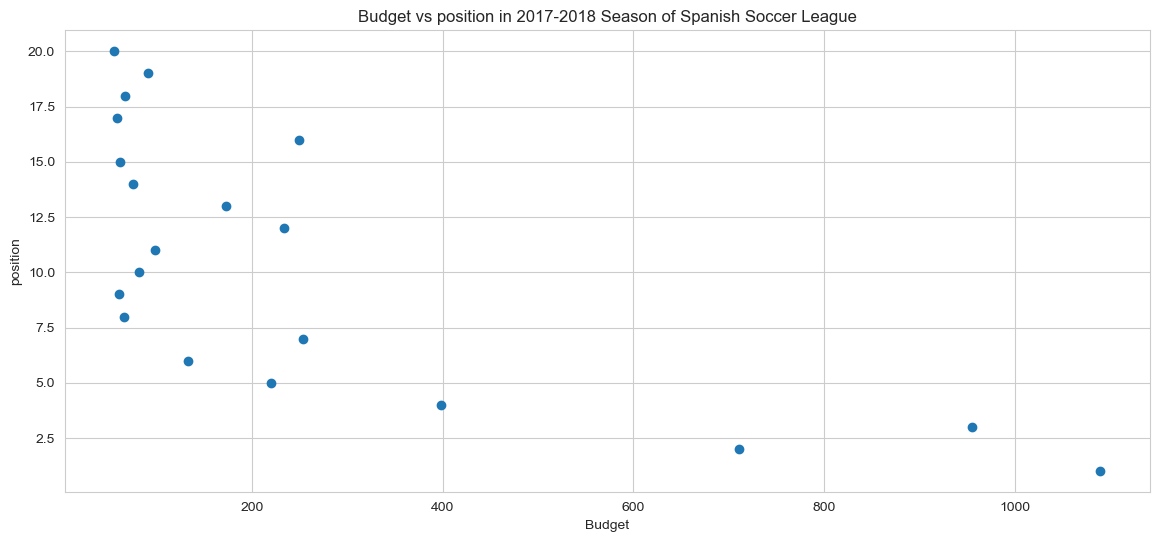

Correlation coefficient for 2018-2019 season: -0.7525326355862756


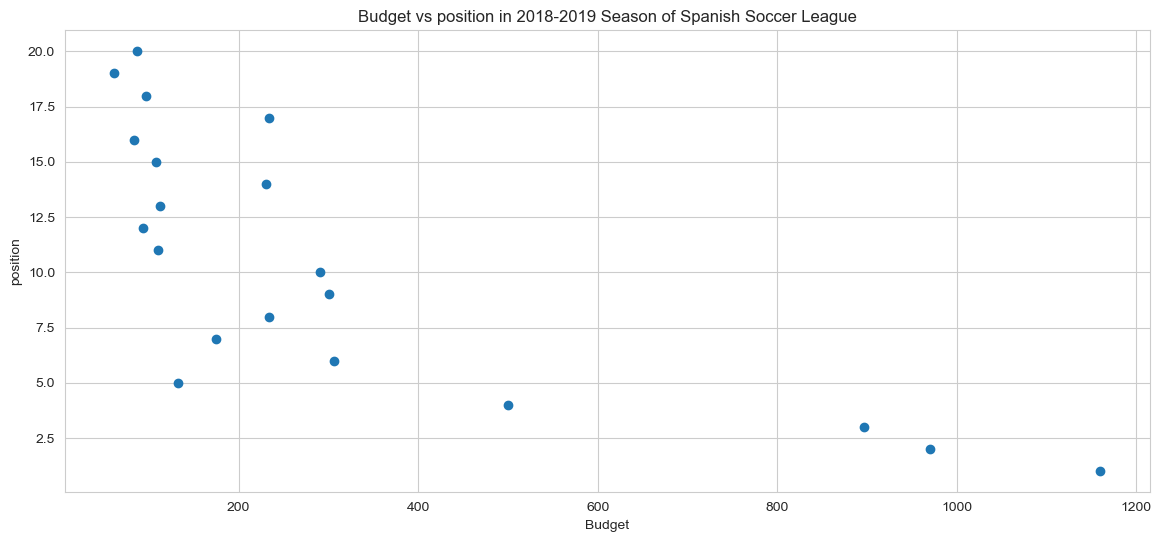

In [235]:
# group the data by season
grouped_data = budget.groupby('Season')

# iterate over each season and calculate the correlation
for season, group in grouped_data:
    # create a scatter plot of budget vs position
    plt.scatter(group['Budget'], group['position'])

    # add labels and title
    plt.xlabel('Budget')
    plt.ylabel('position')
    plt.title(f'Budget vs position in {season} Season of Spanish Soccer League')

    # calculate and print the correlation coefficient
    corr_coef = group['Budget'].corr(group['position'])
    print(f'Correlation coefficient for {season} season:', corr_coef)

    # show the plot
    plt.show()

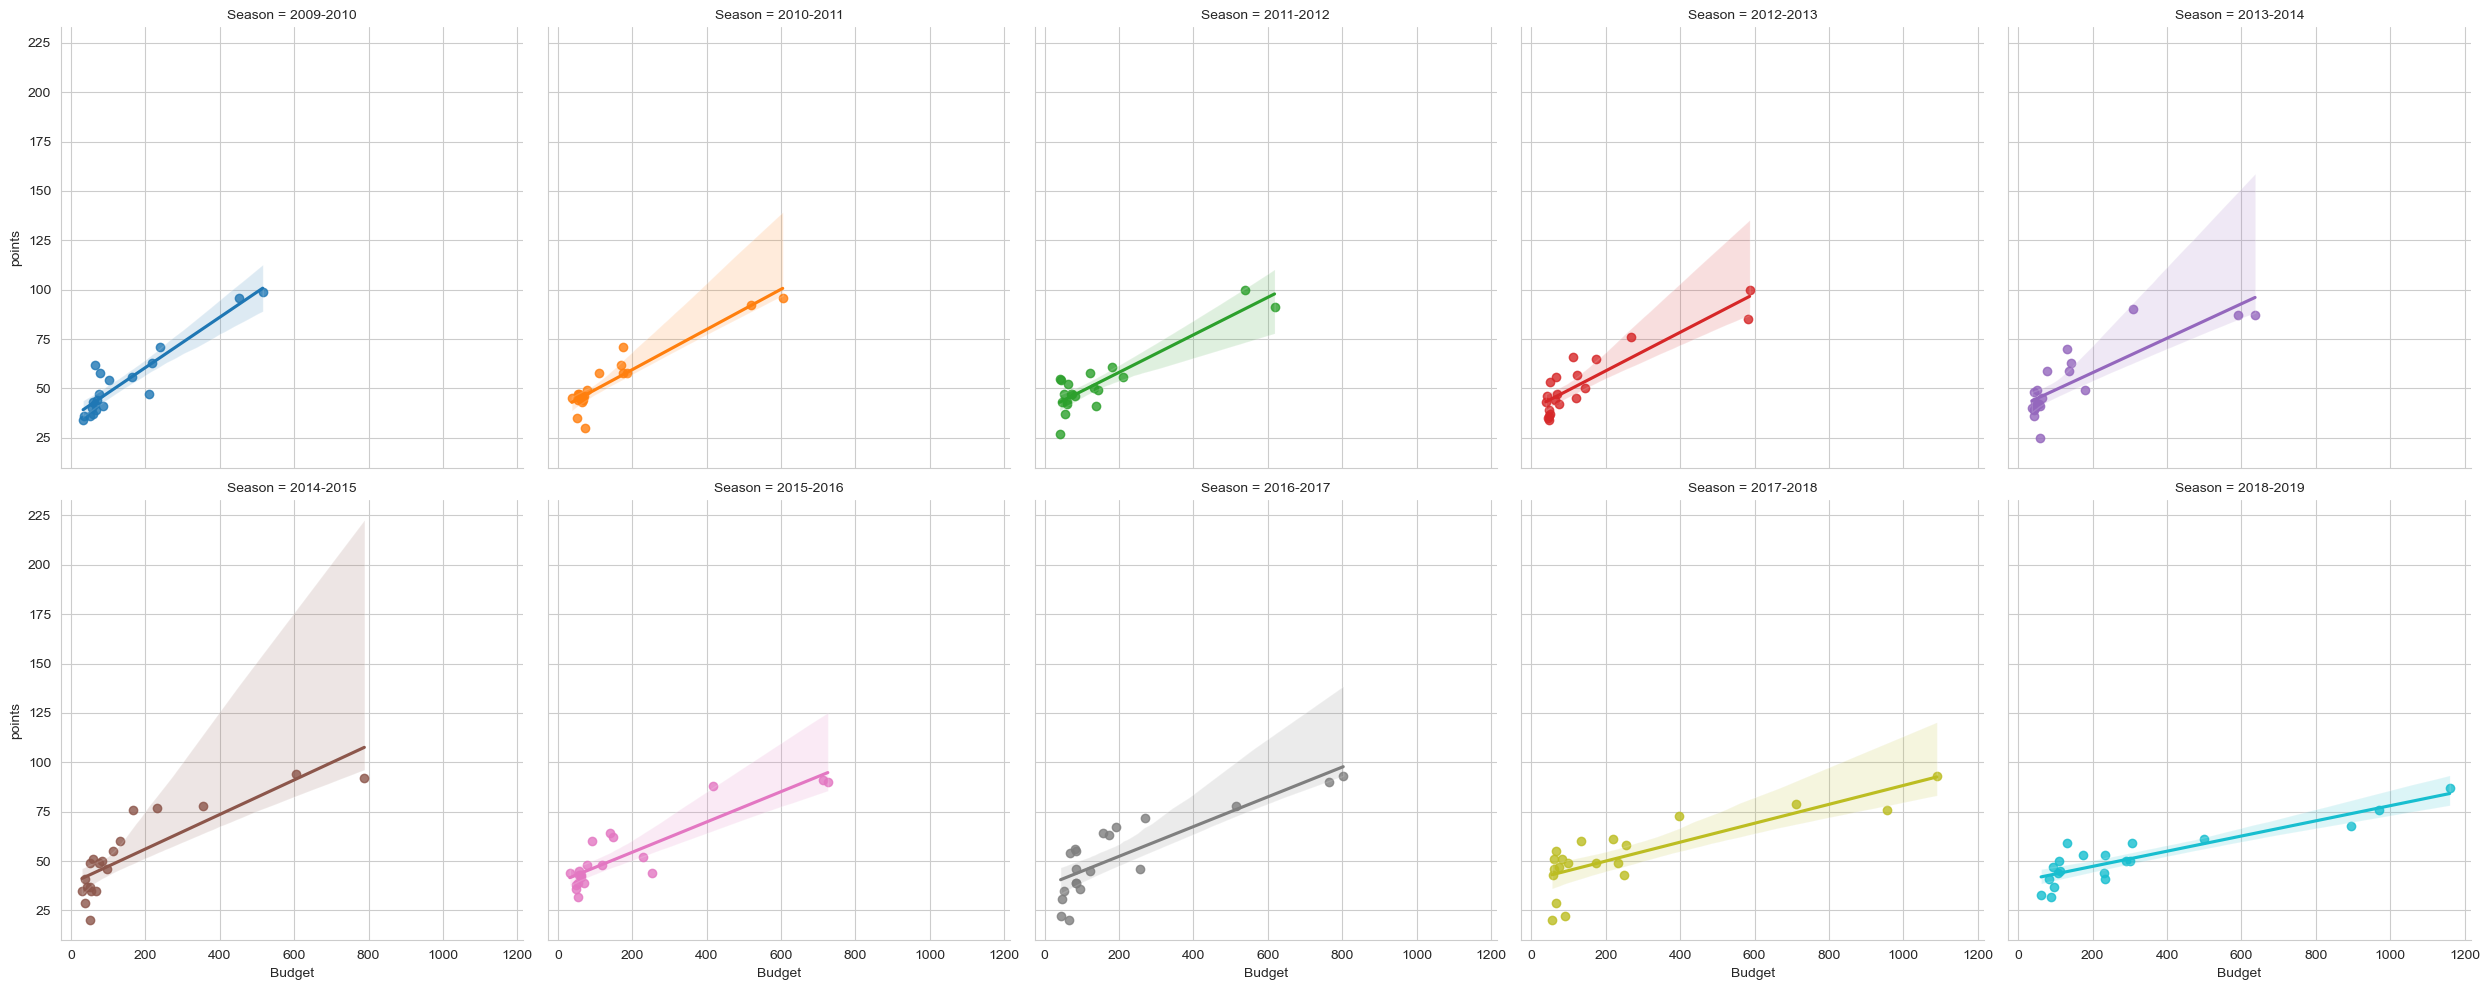

In [236]:
sns.lmplot(data = budget, 
           x = 'Budget', 
           y = 'points', 
           hue = 'Season', 
           col = 'Season', col_wrap=5)

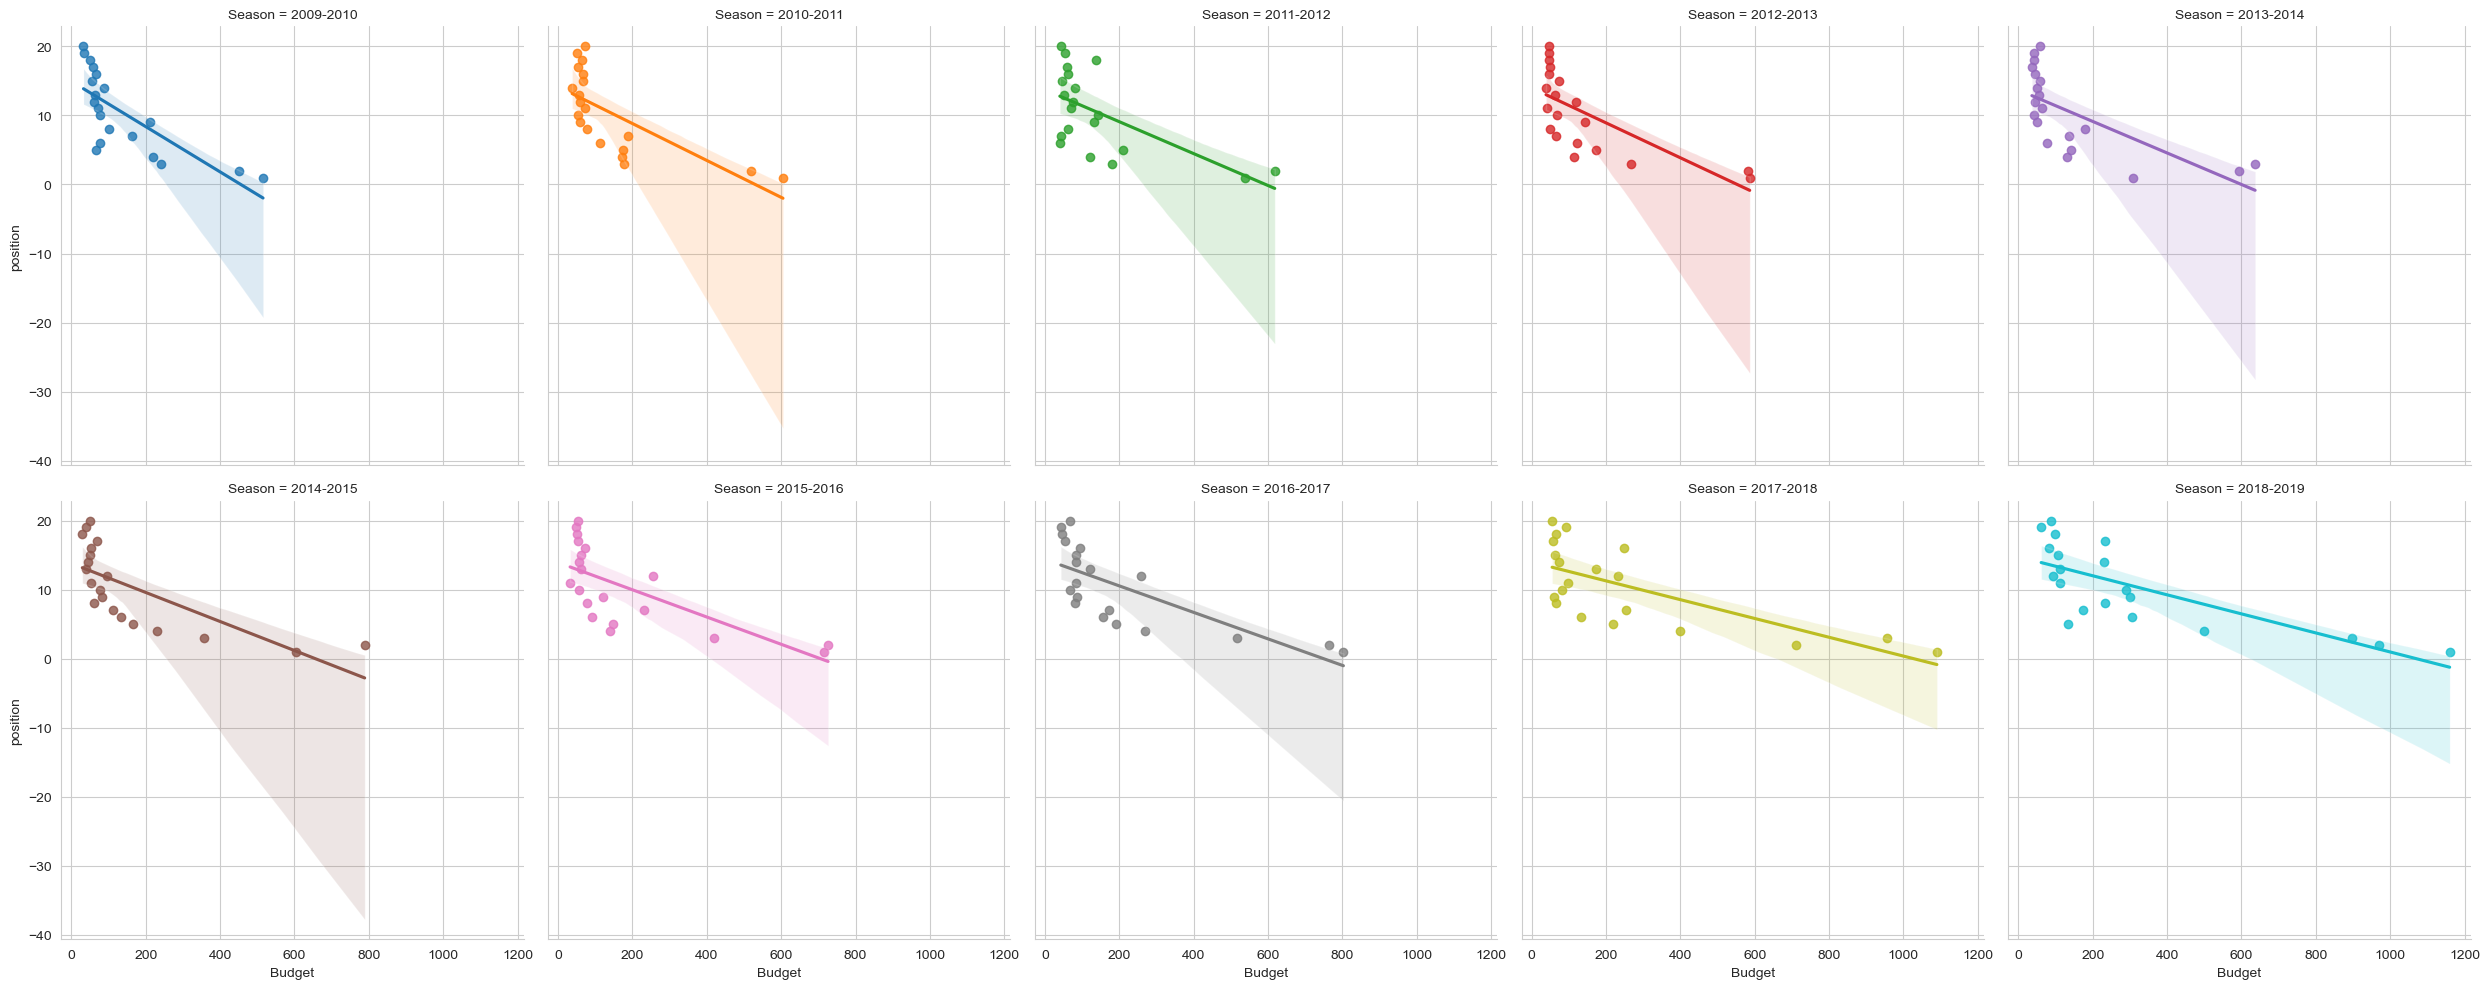

In [277]:
sns.lmplot(data = budget, 
           x = 'Budget', 
           y = 'position', 
           hue = 'Season', 
           col = 'Season', col_wrap=5)

In [238]:
pd.options.display.float_format = '{:.1f}'.format

# calculate the cost per point for each team
budget['Cost_Point'] = (budget['Budget']*1000000) / budget['points']

# calculate the cost per position for each team
budget['Cost_Position'] = (budget['Budget']*1000000) / budget['position']

In [239]:
budget

,Season,Team,Budget,position,points,Cost_Point,Cost_Position
0,2009-2010,Real Madrid,451.7,2,96,4705208.3,225850000.0
1,2009-2010,Barcelona,515.4,1,99,5206060.6,515400000.0
2,2009-2010,Valencia,240.0,3,71,3380281.7,80000000.0
3,2009-2010,Sevilla,218.3,4,63,3465079.4,54575000.0
4,2009-2010,Ath Madrid,210.8,9,47,4485106.4,23422222.2
...,...,...,...,...,...,...,...
195,2018-2019,Alaves,110.8,11,50,2216000.0,10072727.3
196,2018-2019,Girona,97.2,18,37,2628378.4,5402777.8
197,2018-2019,Vallecano,86.7,20,32,2709375.0,4335000.0
198,2018-2019,Huesca,61.4,19,33,1860606.1,3231578.9


# Models for position each season

## Linear Regression

In [241]:
X = budget[['Budget']]
y = budget['position']

In [242]:
lr=LinearRegression()

In [243]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=40)

In [247]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((160, 1), (40, 1), (160,), (40,))

In [248]:
lr.fit(Xtrain, ytrain)

LinearRegression()

In [249]:
predicted_position_lr = lr.predict(Xtest)

In [252]:
predicted_position_lr = np.clip(np.round(predicted_position_lr), 1, 20)

##### How does this look?

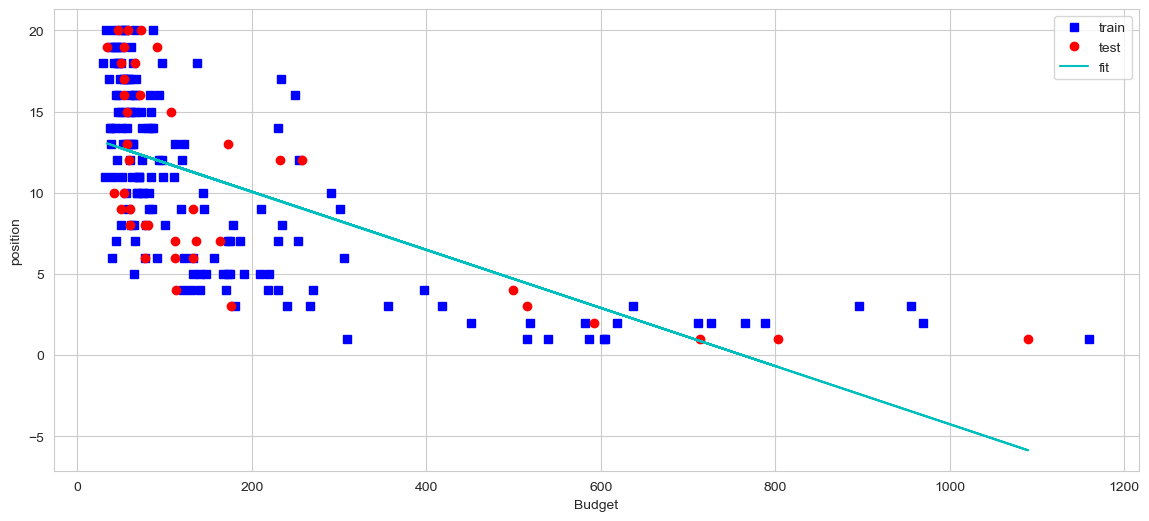

In [166]:
plt.plot(Xtrain, ytrain, 'bs', label="train")
plt.plot(Xtest, ytest, 'ro', label="test")
plt.plot(Xtest, ypred, 'c', label="fit")
plt.xlabel('Budget')
plt.ylabel('position')
plt.legend()

#### Model evaluation metrics

In [273]:
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, ypred))
print('Mean absolute error: %.2f'
      % mean_absolute_error(ytest, ypred))
print('R-squared (Coefficient of determination): %.2f'
      % r2_score(ytest, ypred))

Mean squared error: 21.31
Mean absolute error: 4.08
R-squared (Coefficient of determination): 0.40


In [274]:
print(f'm.coef_ = {lm.coef_}, m.intercept_ = {lm.intercept_}')

m.coef_ = [-0.01789184], m.intercept_ = 13.646232066415939


In [275]:
print("train score :", lm.score(Xtrain, ytrain),2)
print("test score:", lm.score(Xtest, ytest))

train score : 0.4368637965021033 2
test score: 0.40207447329385937


### Column predicted position linear regression

In [278]:
ypred = lr.predict(X)

In [279]:
predicted_position_lr = np.clip(np.round(ypred), 1, 20)

In [282]:
budget['predicted_position_lr'] = predicted_position_lr

In [285]:
budget

,Season,Team,Budget,position,points,Cost_Point,Cost_Position,predicted_position_lr
0,2009-2010,Real Madrid,451.7,2,96,4705208.3,225850000.0,6.0
1,2009-2010,Barcelona,515.4,1,99,5206060.6,515400000.0,4.0
2,2009-2010,Valencia,240.0,3,71,3380281.7,80000000.0,9.0
3,2009-2010,Sevilla,218.3,4,63,3465079.4,54575000.0,10.0
4,2009-2010,Ath Madrid,210.8,9,47,4485106.4,23422222.2,10.0
...,...,...,...,...,...,...,...,...
195,2018-2019,Alaves,110.8,11,50,2216000.0,10072727.3,12.0
196,2018-2019,Girona,97.2,18,37,2628378.4,5402777.8,12.0
197,2018-2019,Vallecano,86.7,20,32,2709375.0,4335000.0,12.0
198,2018-2019,Huesca,61.4,19,33,1860606.1,3231578.9,13.0


## Random Forest

In [290]:
X = budget[['Budget']]
y = budget['position']

In [291]:
rf = RandomForestRegressor(max_depth=7)

In [292]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=45)

In [293]:
rf.fit(Xtrain, ytrain)

RandomForestRegressor(max_depth=7)

In [294]:
print("train score :", rf.score(Xtrain, ytrain))
print("test score :", rf.score(Xtest, ytest))

train score : 0.876802297893258
test score : 0.43055207158753694


In [295]:
ypred = rf.predict(Xtest)

In [296]:
# The mean squared error 
print('Mean squared error: %.2f'
      % mean_squared_error(ytest, ypred))
# The mean absolute error 
print('Mean absolute error: %.2f'
      % mean_absolute_error(ytest, ypred))
# The coefficient of determination: 1 is perfect prediction f
print('R-squared (Coefficient of determination): %.2f'
      % r2_score(ytest, ypred))

Mean squared error: 17.22
Mean absolute error: 3.35
R-squared (Coefficient of determination): 0.43


In [297]:
# Get the RMSE for the train dataset
print(round(np.sqrt(mean_squared_error(ytrain, rf.predict(Xtrain))),2))
 
# Get the RMSE for the test dataset
print(round(np.sqrt(mean_squared_error(ytest, rf.predict(Xtest))),2))

2.05
4.15


# Prediction of points

In [185]:
model=LinearRegression()

X = budget[['Budget']]
y = budget['points']

model.fit(X, y)

predicted_points = model.predict(X)

budget['predicted_points'] = predicted_points

In [190]:
budget

,Season,Team,Budget,position,points,Cost per Point,Cost per Position,predicted_position,predicted_points
0,2009-2010,Real Madrid,451.70,2,96,4.705208,225.850000,6.0,69.947057
1,2009-2010,Barcelona,515.40,1,99,5.206061,515.400000,5.0,74.025286
2,2009-2010,Valencia,240.00,3,71,3.380282,80.000000,9.0,56.393507
3,2009-2010,Sevilla,218.30,4,63,3.465079,54.575000,10.0,55.004220
4,2009-2010,Ath Madrid,210.80,9,47,4.485106,23.422222,10.0,54.524052
...,...,...,...,...,...,...,...,...,...
195,2018-2019,Alaves,110.80,11,50,2.216000,10.072727,12.0,48.121808
196,2018-2019,Girona,97.25,18,37,2.628378,5.402778,12.0,47.254304
197,2018-2019,Vallecano,86.70,20,32,2.709375,4.335000,12.0,46.578867
198,2018-2019,Huesca,61.40,19,33,1.860606,3.231579,13.0,44.959099


In [194]:
pwd

'/Users/boris/Documents/DataScience/royco_spiced_projects/WEEK12 Final Project/Data/Processed Data'

In [195]:
budget[['Season', 'Team', 'Budget']].to_csv('value.csv', index=False)

In [196]:
budget[['Season', 'Team', 'position', 'Cost per Position','predicted_position']].to_csv('position.csv', index=False)

In [197]:
budget[['Season', 'Team', 'points', 'Cost per Point', 'predicted_points']].to_csv('points.csv', index=False)

In [198]:
budget.to_csv('budget.csv', index=False)